In [1]:
#Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
#!pip install plotly

import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        #info['Min Value'] = df.apply(lambda x: np.nanmin(x))
        #info['Max Value'] = df.apply(lambda x: np.nanmax(x))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')


In [2]:
from pathlib import Path
p = Path().cwd()
print(f"original File path: {p}")
print(p)
#updating to add the data to the file path and removing the current ipynb code library
stringpath= str(p)[0:str(p).rfind('\\')] + '\\data'
print(f"Updated File Path to pick from Data Library: { stringpath}")
ngsimfile=stringpath + '/' + 'FilteredNGSIMData.csv'
ngsim = pd.read_csv(ngsimfile,low_memory=False)
#ngsim['Vehicle_combination']= ngsim['Preceding_Vehicle_Class'] + '-'+ ngsim['Following_Vehicle_Class']
ngsim.rename(columns={'v_Vel': 'Vehicle_Velocity'},inplace=True) 

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Updated File Path to pick from Data Library: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [3]:
ngsim.describe()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,Vehicle_Velocity,v_Acc,Preceding,Following,Space_Headway,Time_Headway
count,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06,8.557062e+06
mean,1.403851e+03,5.206115e+03,8.821323e+02,1.116220e+12,3.426832e+01,9.518579e+02,6.253157e+06,1.999551e+06,1.565179e+01,6.537762e+00,2.449395e+01,8.944399e-02,1.395834e+03,1.412067e+03,6.351322e+01,3.288607e+02
std,7.936738e+02,2.569865e+03,3.907336e+02,2.704783e+09,1.921640e+01,5.114393e+02,2.044633e+05,1.305716e+05,5.999777e+00,9.357187e-01,1.447675e+01,4.621638e+00,7.927403e+02,7.947291e+02,3.734525e+01,1.772737e+03
min,1.000000e+00,3.700000e+01,1.630000e+02,1.113433e+12,0.000000e+00,1.802000e+01,6.042604e+06,1.871912e+06,4.000000e+00,2.000000e+00,0.000000e+00,-1.120000e+01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.390000e+02,3.044000e+03,6.200000e+02,1.113437e+12,1.812500e+01,5.190910e+02,6.042768e+06,1.872663e+06,1.380000e+01,5.900000e+00,1.332000e+01,-6.600000e-01,7.290000e+02,7.470000e+02,3.947000e+01,1.920000e+00
50%,1.385000e+03,5.282000e+03,8.070000e+02,1.118847e+12,3.102800e+01,9.155990e+02,6.451198e+06,1.873263e+06,1.490000e+01,6.400000e+00,2.426000e+01,0.000000e+00,1.378000e+03,1.391000e+03,5.460000e+01,2.650000e+00
75%,1.993000e+03,7.362000e+03,9.920000e+02,1.118848e+12,5.174100e+01,1.348536e+03,6.451850e+06,2.133873e+06,1.600000e+01,7.000000e+00,3.500000e+01,1.000000e+00,1.981000e+03,2.001000e+03,7.689000e+01,3.930000e+00
max,3.366000e+03,1.150600e+04,2.434000e+03,1.118850e+12,9.569700e+01,2.173949e+03,6.452696e+06,2.134741e+06,7.770000e+01,8.500000e+00,9.530000e+01,1.120000e+01,3.366000e+03,3.366000e+03,1.271060e+03,1.173390e+04


In [4]:
sniffed_data= sniff(ngsim)
sniffed_data

,data type,percent missing,No. unique,unique values
Vehicle_ID,int64,0.00000,3227,"[515, 2224, 2127, 1033, 1890, 744, 2283, 2252,..."
Frame_ID,int64,0.00000,11470,"[2330, 6548, 6459, 4827, 9157, 3392, 8002, 636..."
Total_Frames,int64,0.00000,1513,"[1123, 1902, 567, 592, 628, 996, 1821, 2150, 1..."
Global_Time,int64,0.00000,56968,"[1118848075000, 1113437421700, 1118847624800, ..."
Following,int64,0.00000,3229,"[523, 2211, 2132, 1040, 1897, 752, 2344, 2266,..."
Preceding,int64,0.00000,3222,"[500, 2208, 2124, 1029, 1882, 740, 2330, 2117,..."
v_Acc,float64,0.00000,2239,"[2.05, -0.76, 11.2, 0.1, -0.55, -0.04, 3.93, 0..."
Vehicle_Velocity,float64,0.00000,8703,"[23.31, 26.54, 37.52, 41.99, 45.12, 24.54, 6.5..."
v_Width,float64,0.00000,55,"[6.9, 4.4, 8.5, 5.9, 7.8, 4.9, 7.9, 5.0, 6.8, ..."
v_length,float64,0.00000,275,"[13.0, 14.3, 13.5, 24.0, 15.0, 15.9, 15.3, 13...."


In [5]:



#filtered_ngsim= ngsim[( (ngsim['Vehicle_combination'] == 'Car-Car') | (ngsim['Location'] == 'Car-Heavy Vehicle') ) |
#                      ( (ngsim['Vehicle_combination'] == 'Heavy Vehicle-Car') | (ngsim['Location'] == 'Motorcycle-Car') ) |
#                      ( (ngsim['Vehicle_combination'] == 'Car-Motorcycle') | (ngsim['Location'] == 'Heavy Vehicle-Heavy Vehicle') ) |
#                      ( (ngsim['Vehicle_combination'] == 'Heavy Vehicle-Motorcycle') ) ]






In [6]:
ngsim['Vehicle_combination'].unique()

array(['Car-Car', 'Car-Heavy Vehicle', 'Car-Motorcycle',
       'Heavy Vehicle-Car', 'Motorcycle-Car',
       'Heavy Vehicle-Heavy Vehicle', 'Heavy Vehicle-Motorcycle',
       'Motorcycle-Heavy Vehicle'], dtype=object)

In [7]:
filtered_ngsim= ngsim

In [8]:
#


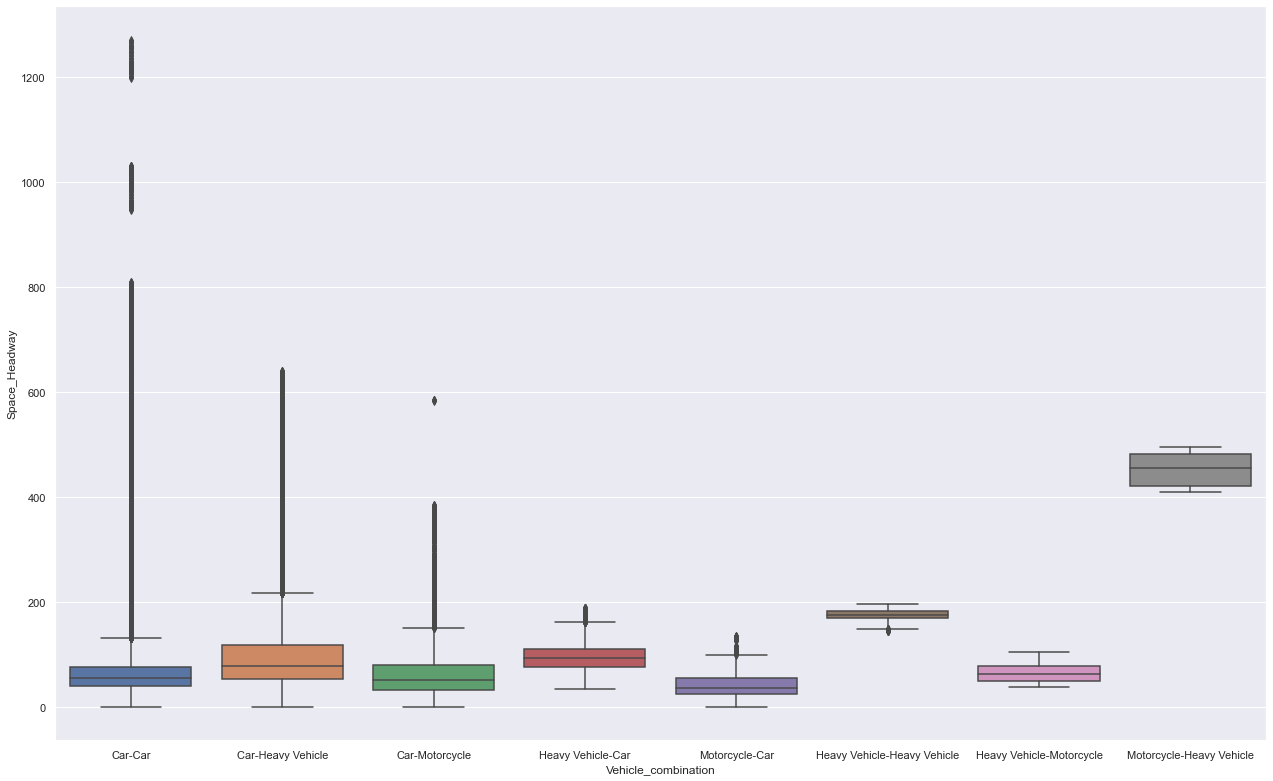

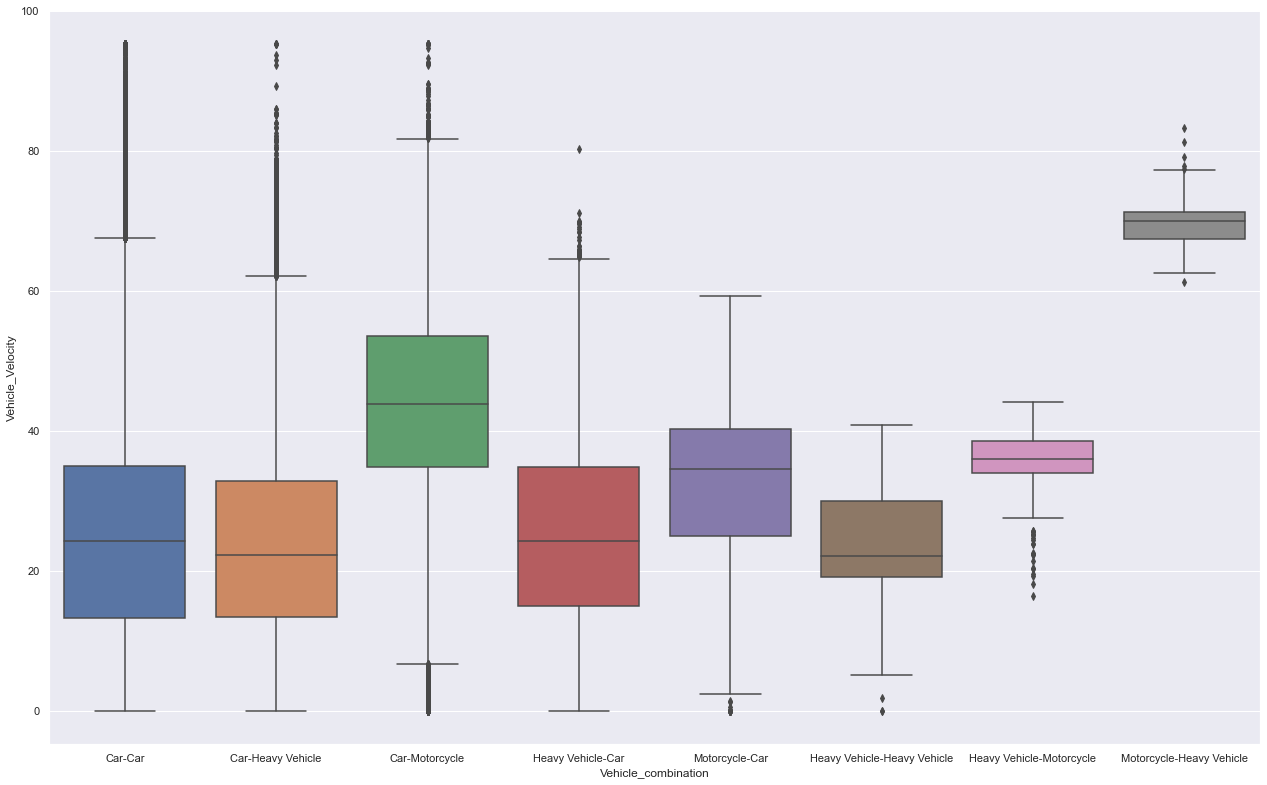

In [9]:

sns.set(rc={'figure.figsize':(21.7,13.5)})
sns.boxplot(data=filtered_ngsim,y='Space_Headway',x='Vehicle_combination')
plt.show()
sns.boxplot(data=filtered_ngsim,y='Vehicle_Velocity',x='Vehicle_combination')
plt.show()
#sns.scatterplot(data=filtered_ngsim,y='Space_Headway',x='Vehicle_Velocity',hue='Vehicle_combination')

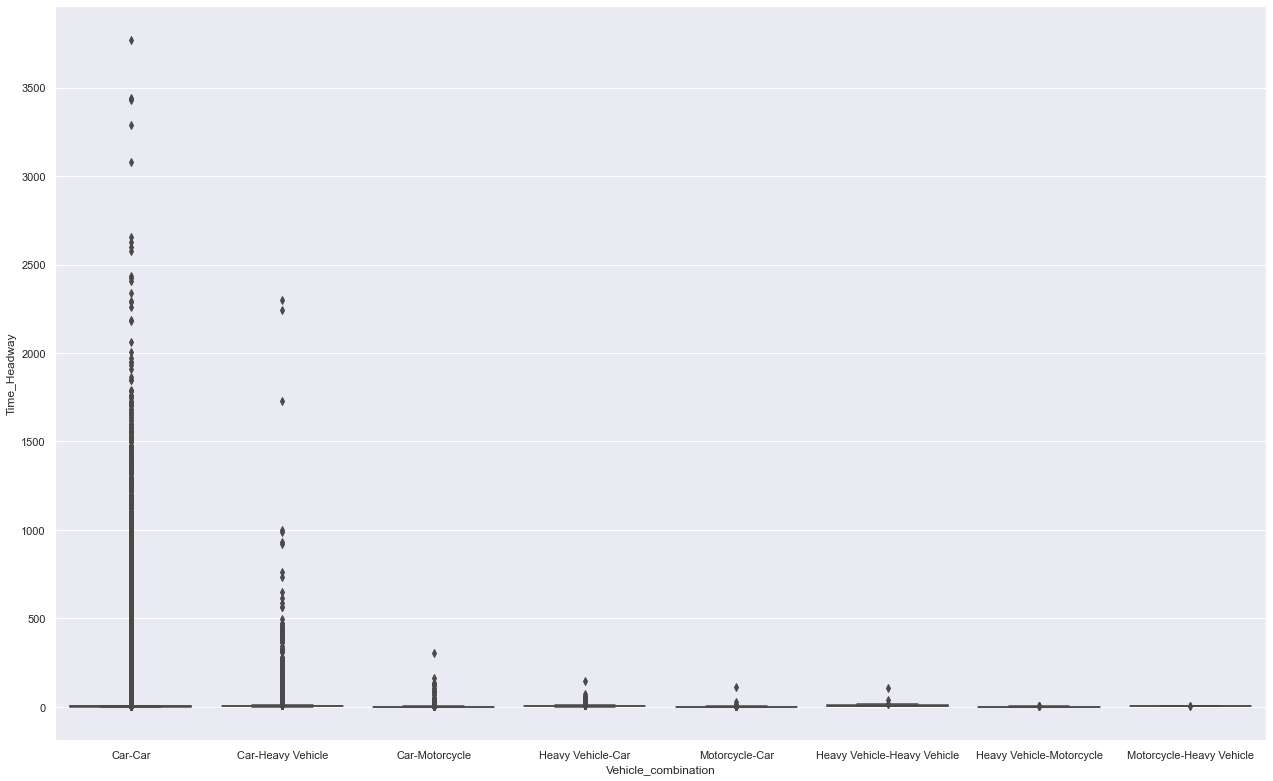

In [10]:
filtered_ngsim =ngsim[((ngsim['Time_Headway'] < 9500 ) ) ]
sns.boxplot(data=filtered_ngsim,y='Time_Headway',x='Vehicle_combination')
plt.show()

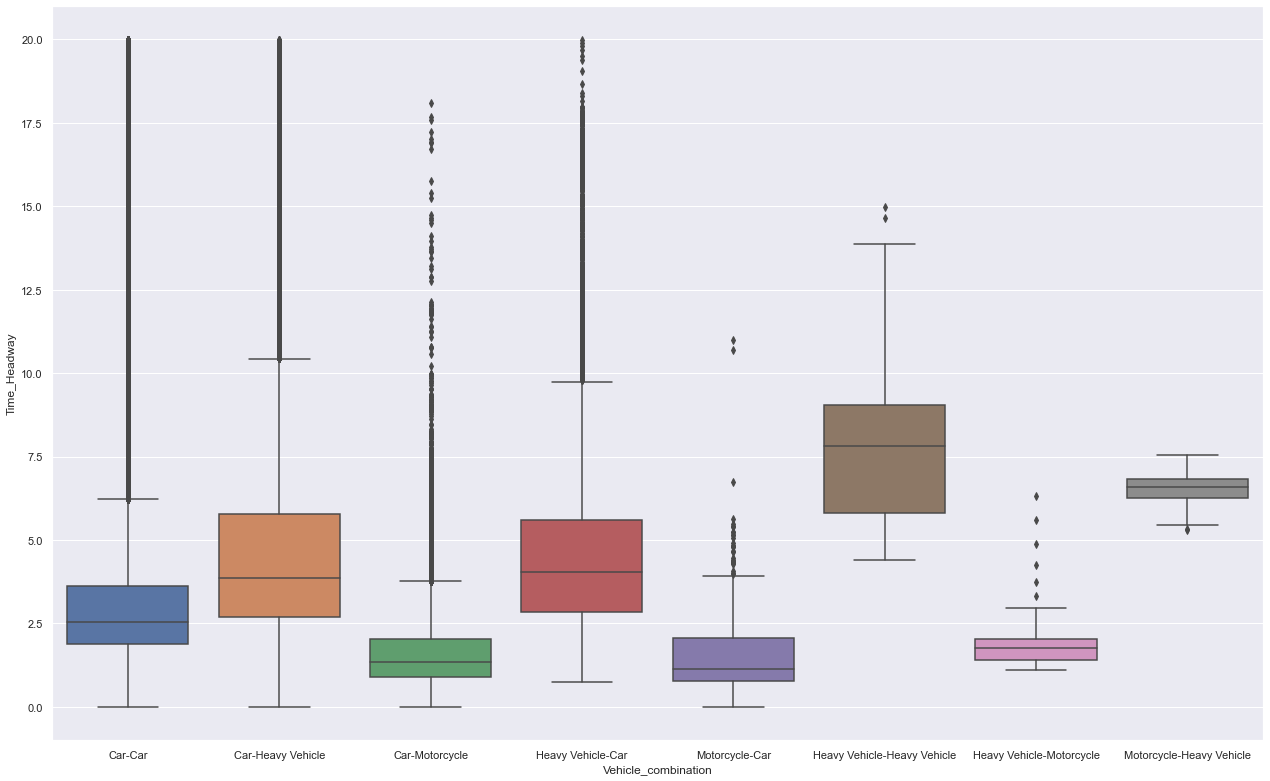

In [11]:
filtered_ngsim =ngsim[((ngsim['Time_Headway'] < 20 ) ) ]
sns.boxplot(data=filtered_ngsim,y='Time_Headway',x='Vehicle_combination')
plt.show()

In [12]:
#filtered_ngsim_CC= filtered_ngsim[((filtered_ngsim['Vehicle_combination'] == 'Car-Car') ) & (filtered_ngsim['Frame_ID'] == 4 )]

In [13]:
#sns.scatterplot(data=filtered_ngsim_CC,y='Space_Headway',x='Vehicle_Velocity',hue='Vehicle_combination')

In [14]:
#sns.lmplot(data=filtered_ngsim_CC, x='Vehicle_Velocity', y='Space_Headway', line_kws={'color': 'g'}, height=3.5, aspect=1.5)

In [15]:
#filtered_ngsim_CC.head()
#sns.scatterplot(data=filtered_ngsim_CC[filtered_ngsim_CC['Frame_ID'] < 75],y='Space_Headway',x='Vehicle_Velocity',hue='Vehicle_combination')

In [16]:
#filtered_ngsim_CC[filtered_ngsim_CC['Frame_ID'] < 100]

In [17]:
#filtered_ngsim_CC.head()

In [18]:

#filtered_ngsim_CC.head()
#sns.scatterplot(data=filtered_ngsim[filtered_ngsim['Location'] == 'i-80'],x='Global_Time',y='Vehicle_Velocity')

In [19]:
filtered_ngsim.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Vehicle_Velocity,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location,Preceding_Vehicle_Class,Following_Vehicle_Class,Vehicle_combination
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,23.31,2.05,500,523,119.10,5.11,us-101,Car,Car,Car-Car
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,23.31,2.05,500,523,119.10,5.11,us-101,Car,Car,Car-Car
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,26.54,-0.76,2208,2211,53.34,2.01,i-80,Car,Car,Car-Car
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,37.52,11.20,2124,2132,48.92,1.30,us-101,Car,Car,Car-Car
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,41.99,0.10,1029,1040,38.81,0.92,us-101,Car,Car,Car-Car


In [20]:
sniff(filtered_ngsim)

,data type,percent missing,No. unique,unique values
Vehicle_ID,int64,0.000000,3227,"[515, 2224, 2127, 1033, 1890, 744, 2283, 2252,..."
Frame_ID,int64,0.000000,11470,"[2330, 6548, 6459, 4827, 9157, 3392, 8002, 636..."
Total_Frames,int64,0.000000,1513,"[1123, 1902, 567, 592, 628, 996, 1821, 2150, 1..."
Global_Time,int64,0.000000,56968,"[1118848075000, 1113437421700, 1118847624800, ..."
Following,int64,0.000000,3229,"[523, 2211, 2132, 1040, 1897, 752, 2344, 2266,..."
Preceding,int64,0.000000,3222,"[500, 2208, 2124, 1029, 1882, 740, 2330, 2117,..."
v_Acc,float64,0.000000,2239,"[2.05, -0.76, 11.2, 0.1, -0.55, -0.04, 3.93, 0..."
Vehicle_Velocity,float64,0.000000,8676,"[23.31, 26.54, 37.52, 41.99, 45.12, 24.54, 6.5..."
v_Width,float64,0.000000,55,"[6.9, 4.4, 8.5, 5.9, 7.8, 4.9, 7.9, 6.8, 6.5, ..."
v_length,float64,0.000000,275,"[13.0, 14.3, 13.5, 24.0, 15.0, 15.9, 15.3, 13...."


<AxesSubplot:xlabel='Vehicle_Velocity', ylabel='Density'>

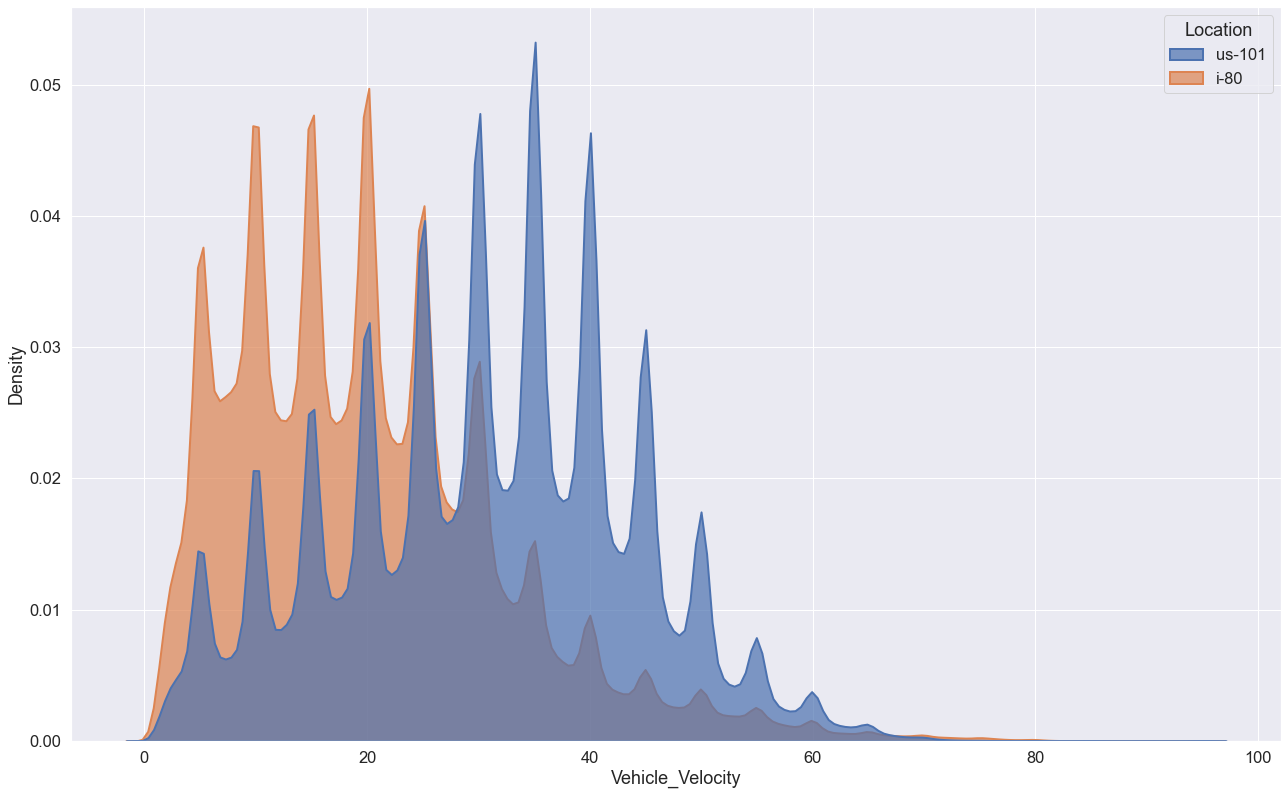

In [21]:
#sns.kdeplot(data=filtered_ngsim,x='Vehicle_Velocity',hue='Location')
sns.set_style("white")
sns.set(font_scale = 1.5)
sns.kdeplot(
   data=filtered_ngsim, x="Vehicle_Velocity", hue="Location",
   fill=True, common_norm=False,
   alpha=.7, linewidth=2,
)

In [22]:
#sample2 = ngsim[ ["Location", "Vehicle_Velocity"]]
#sns.pairplot(sample2, hue="Location")

In [23]:
#sample2 = filtered_ngsim[ ["Location", "Vehicle_Velocity"]]
#sns.pairplot(sample2, hue="Location")

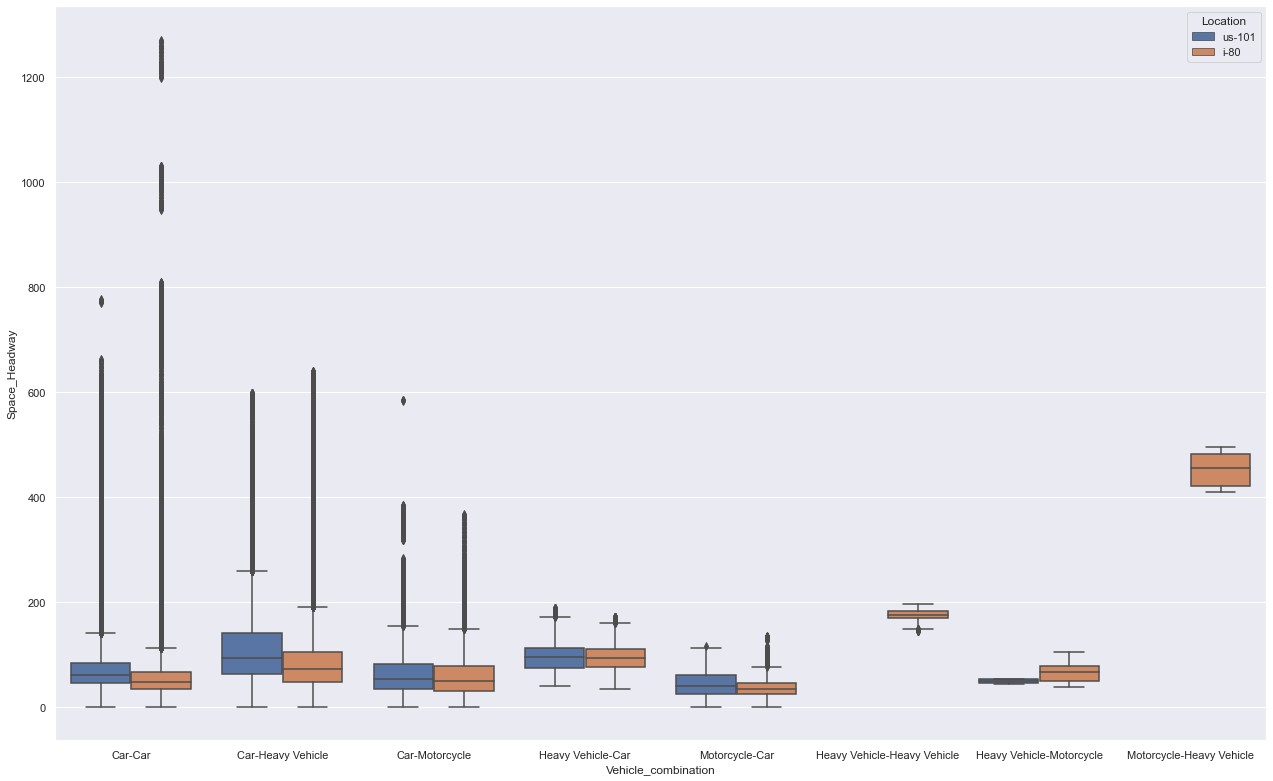

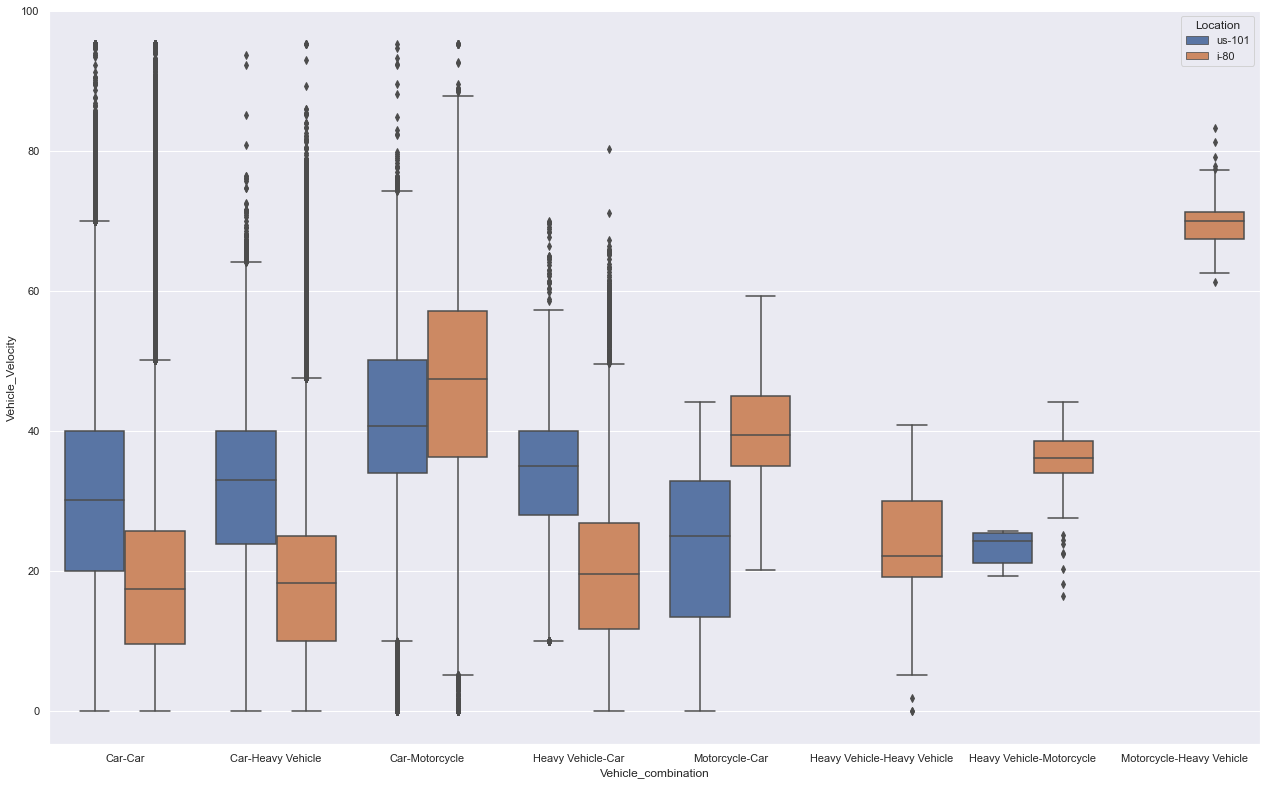

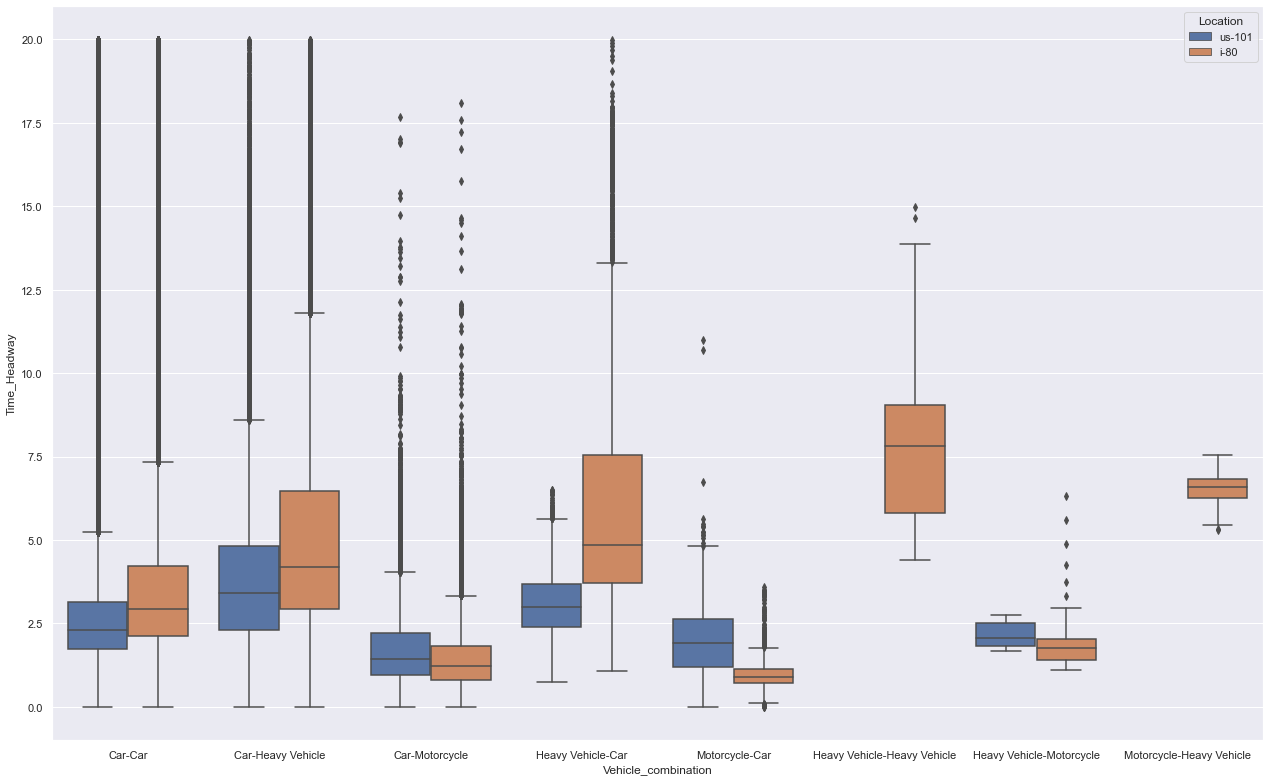

In [24]:
filtered_ngsim= ngsim
sns.set(rc={'figure.figsize':(21.7,13.5)})
sns.boxplot(data=filtered_ngsim,y='Space_Headway',x='Vehicle_combination',hue="Location")
plt.show()
sns.boxplot(data=filtered_ngsim,y='Vehicle_Velocity',x='Vehicle_combination',hue="Location")
plt.show()

filtered_ngsim =ngsim[((ngsim['Time_Headway'] < 20 ) ) ]
sns.boxplot(data=filtered_ngsim,y='Time_Headway',x='Vehicle_combination',hue="Location")
plt.show()

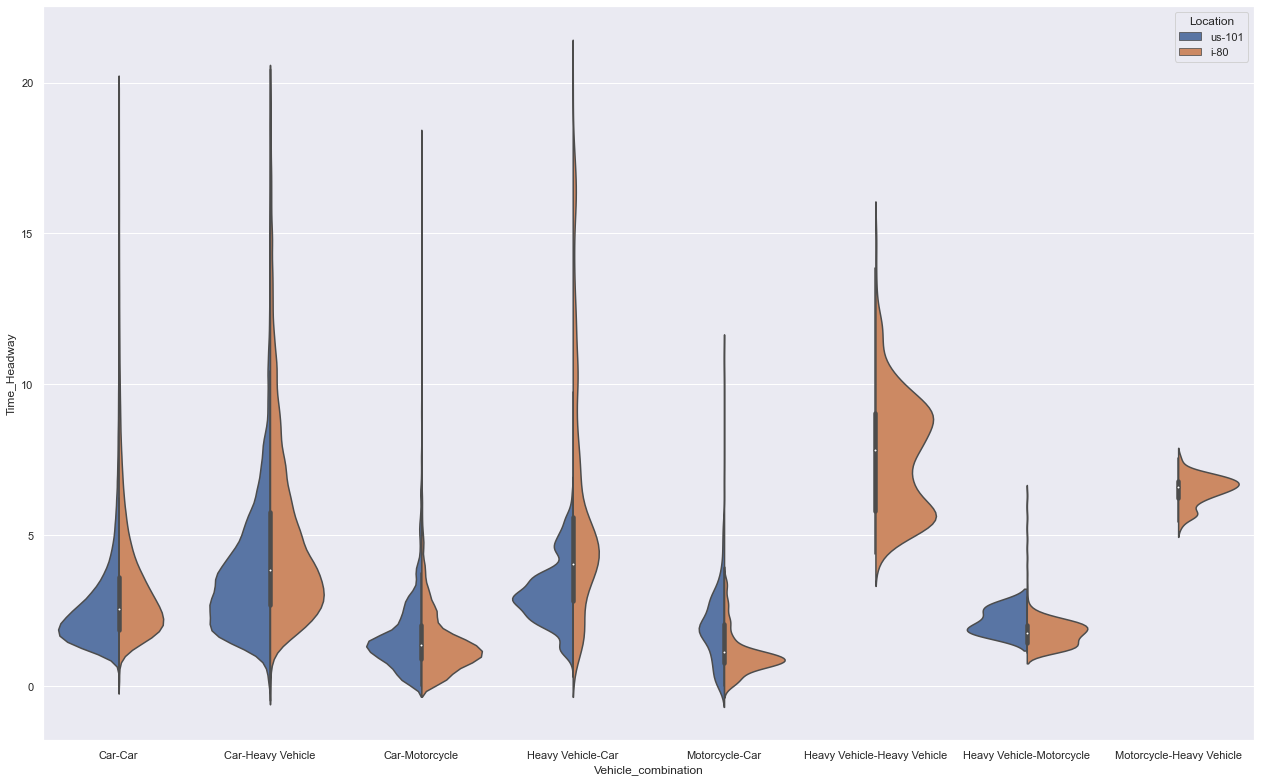

In [25]:
filtered_ngsim =ngsim[((ngsim['Time_Headway'] < 20 ) ) ]
sns.violinplot(data=filtered_ngsim,y='Time_Headway',x='Vehicle_combination',hue="Location",split=True)
plt.show()

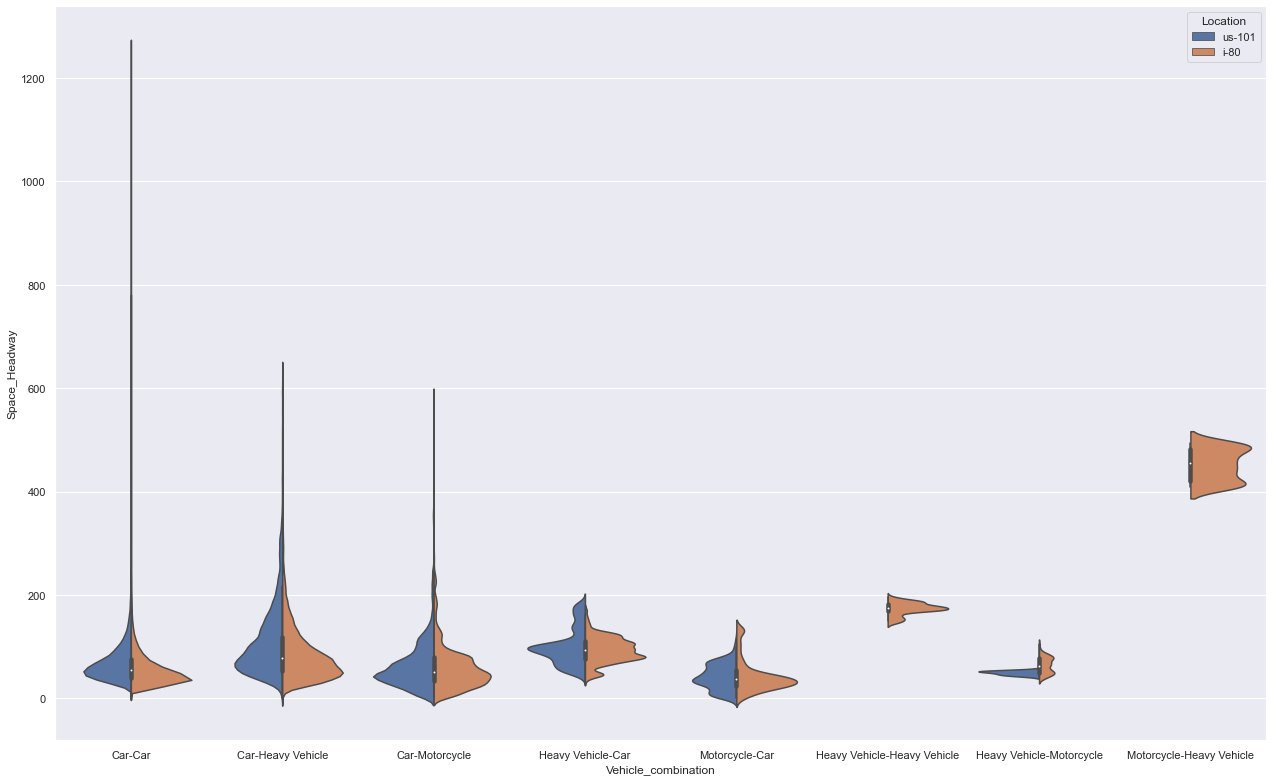

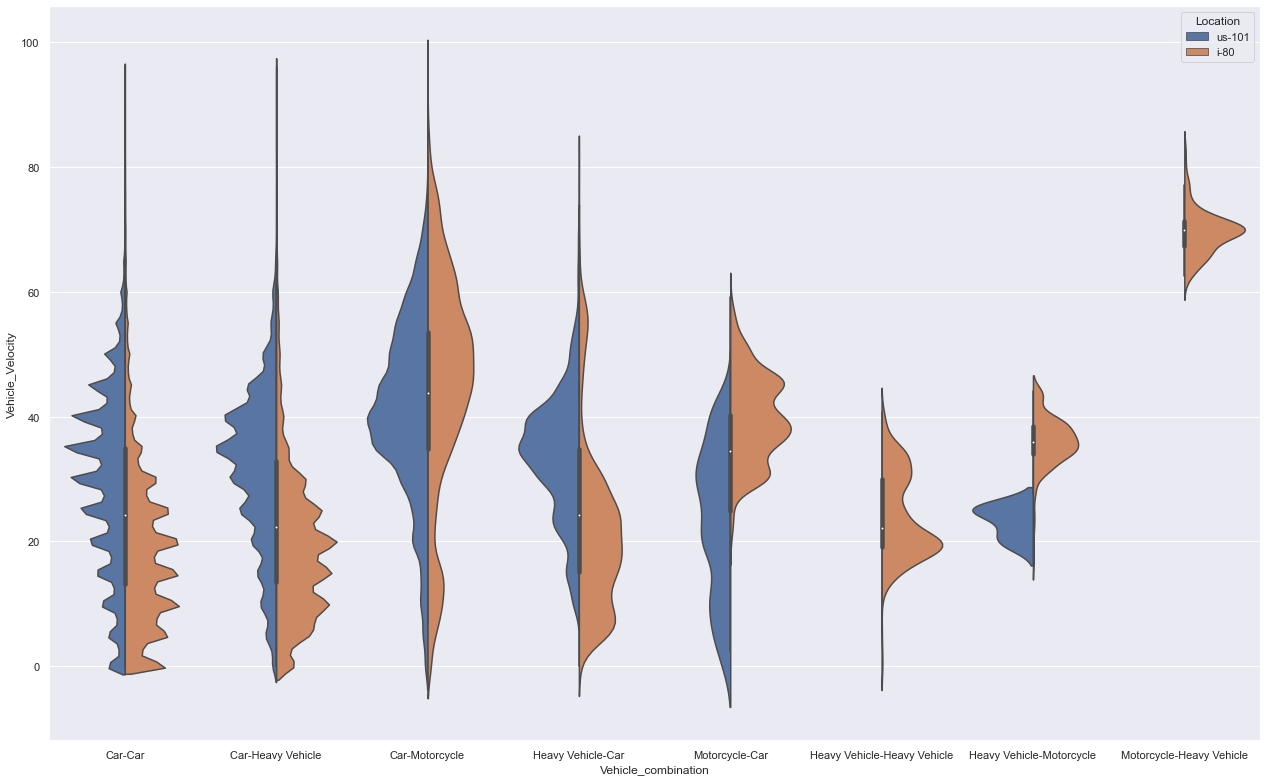

In [26]:
filtered_ngsim= ngsim
sns.set(rc={'figure.figsize':(21.7,13.5)})
sns.violinplot(data=filtered_ngsim,y='Space_Headway',x='Vehicle_combination',hue="Location",split=True)
plt.show()
sns.violinplot(data=filtered_ngsim,y='Vehicle_Velocity',x='Vehicle_combination',hue="Location",split=True)
plt.show()




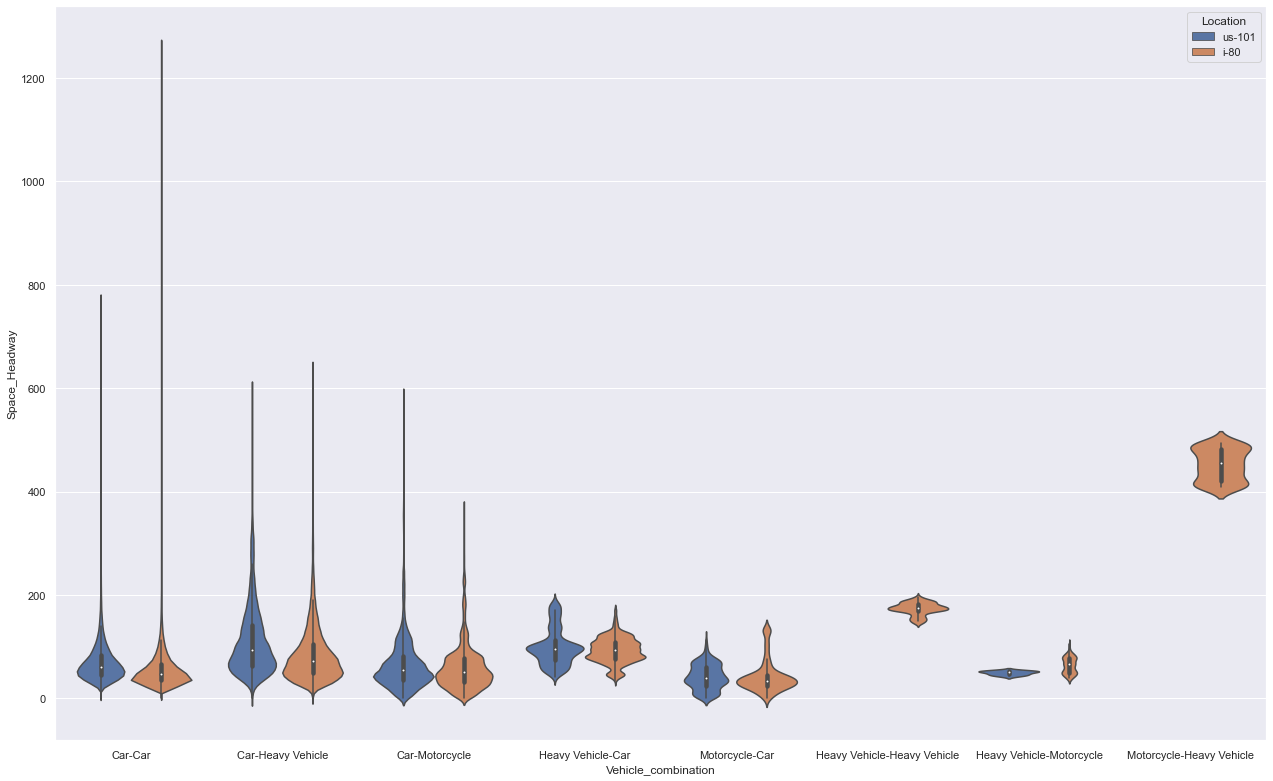

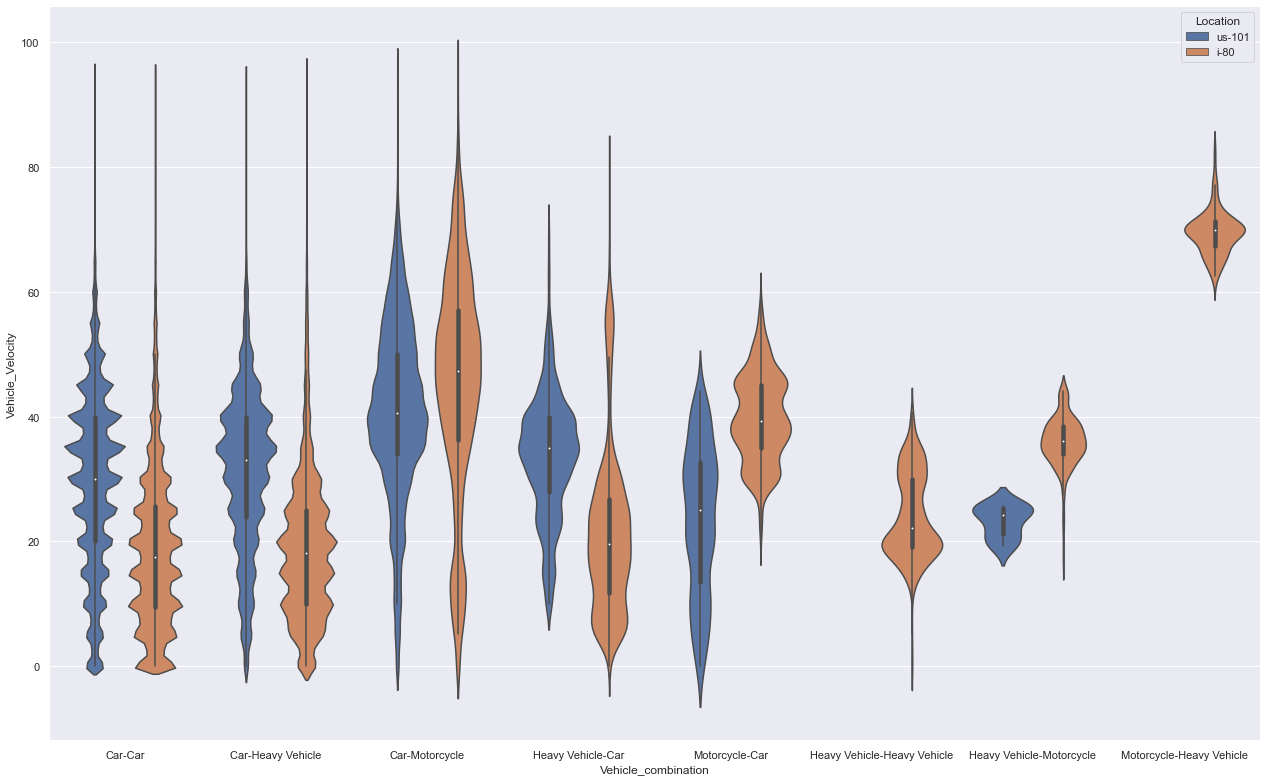

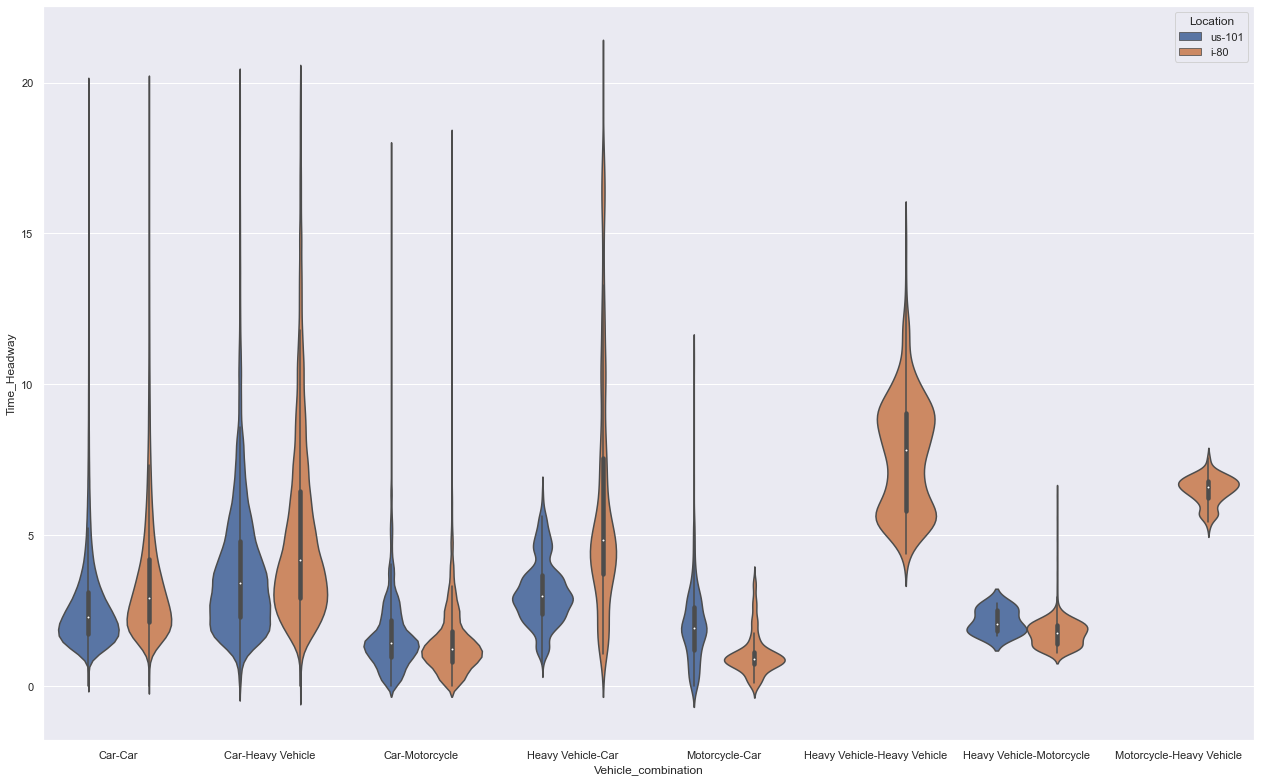

In [27]:
filtered_ngsim= ngsim
sns.set(rc={'figure.figsize':(21.7,13.5)})
sns.violinplot(data=filtered_ngsim,y='Space_Headway',x='Vehicle_combination',hue="Location")
plt.show()
sns.violinplot(data=filtered_ngsim,y='Vehicle_Velocity',x='Vehicle_combination',hue="Location")
plt.show()

filtered_ngsim =ngsim[((ngsim['Time_Headway'] < 20 ) ) ]
sns.violinplot(data=filtered_ngsim,y='Time_Headway',x='Vehicle_combination',hue="Location")
plt.show()

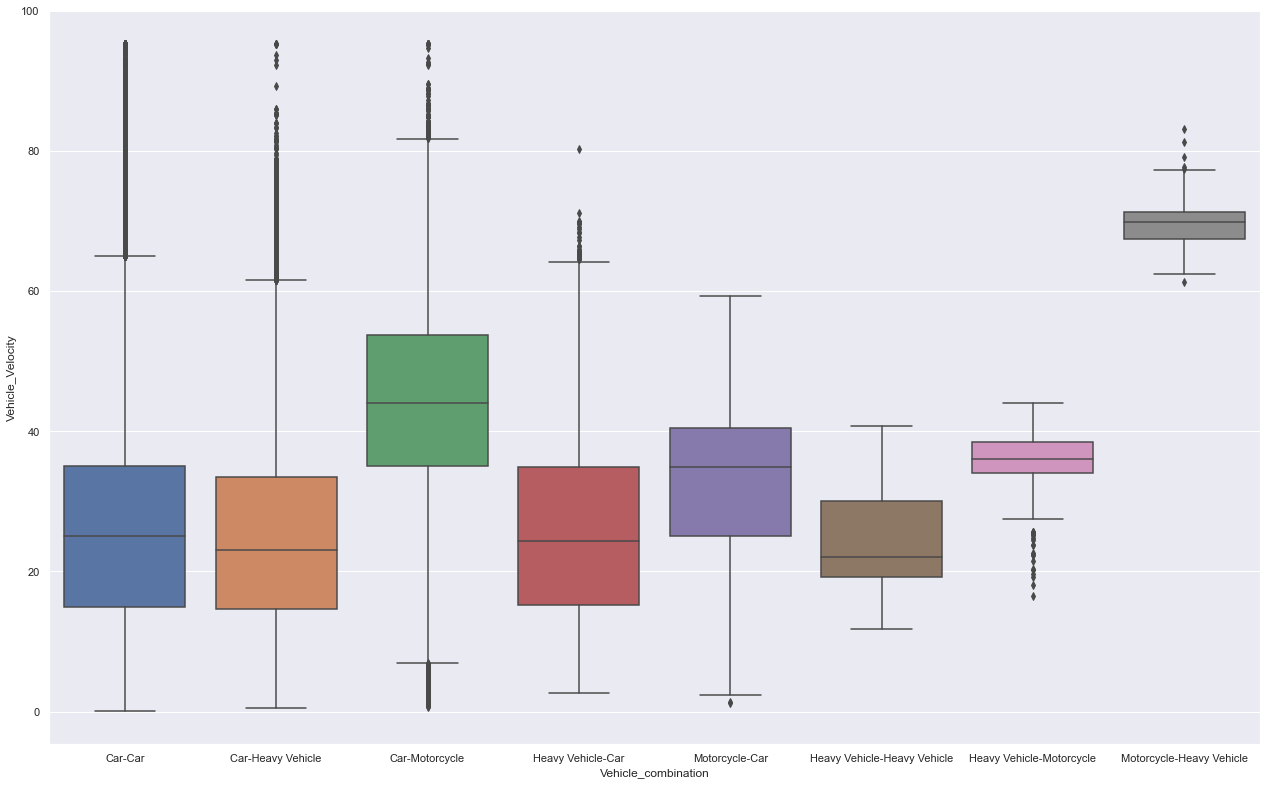

In [28]:

sns.boxplot(data=filtered_ngsim,y='Vehicle_Velocity',x='Vehicle_combination')
plt.show()
#sns.

In [29]:

#plt.pie(data = filtered_ngsim.groupby("Vehicle_combination").sum(), x = filtered_ngsim["Vehicle_combination"].value_counts)

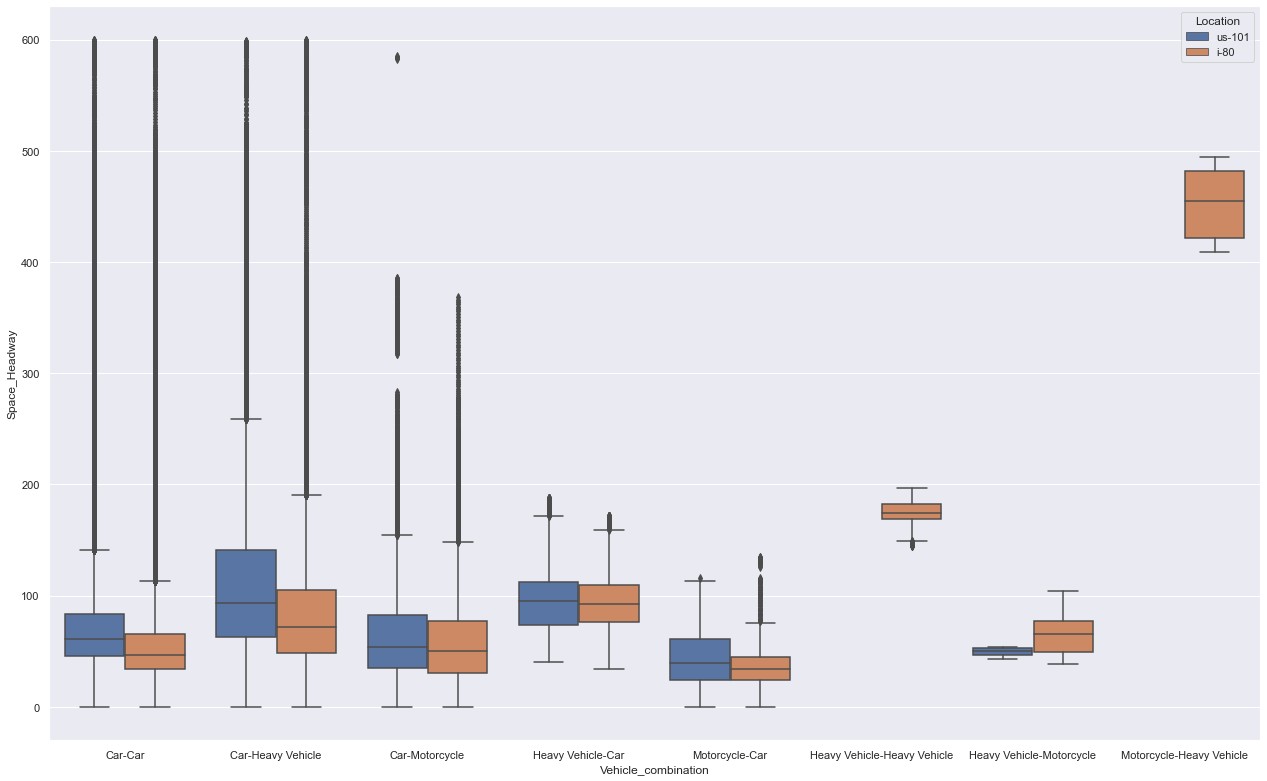

In [30]:

filtered_ngsim =ngsim[((ngsim['Space_Headway'] < 600 ) ) ]
sns.boxplot(data=filtered_ngsim,y='Space_Headway',x='Vehicle_combination',hue="Location")
sns.set_style("white")
sns.set_style("whitegrid")
sns.set(font_scale = 3)
sns.set(rc={'figure.figsize':(21.7,13.5)})
plt.show()

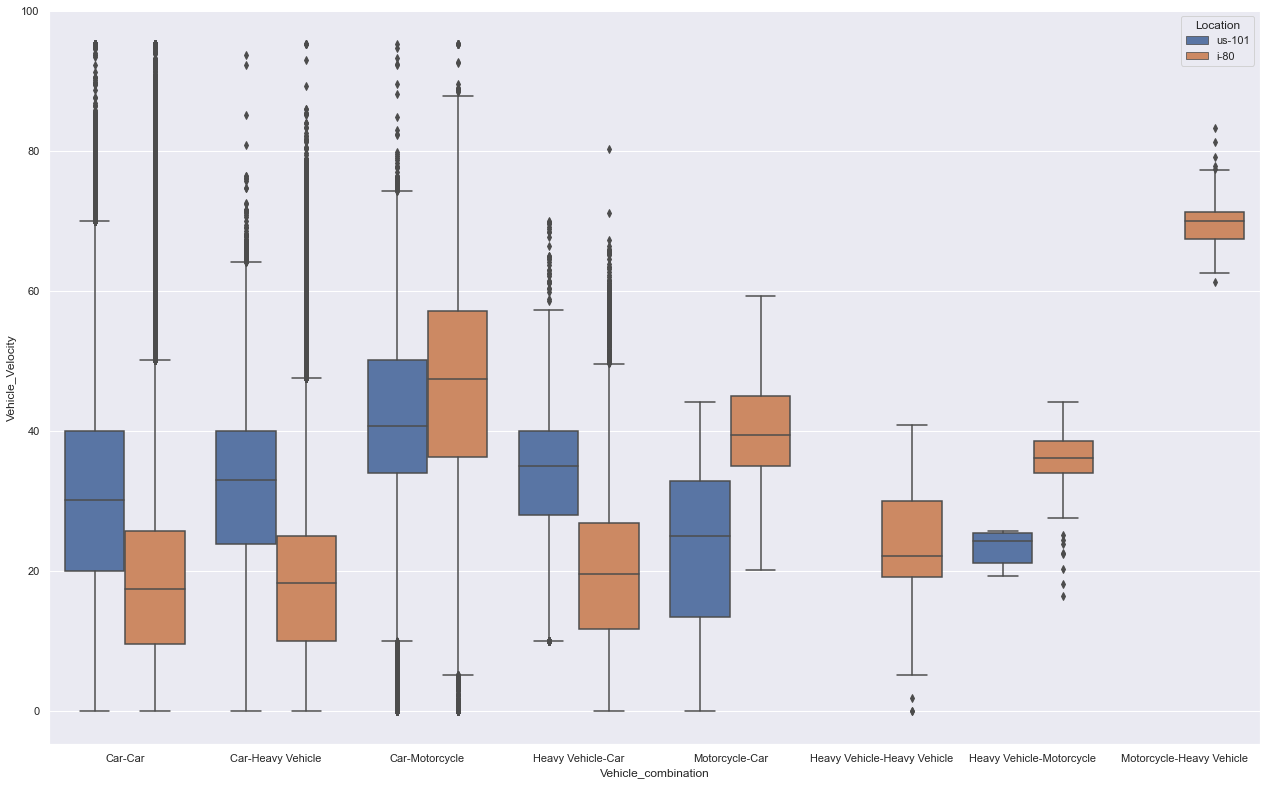

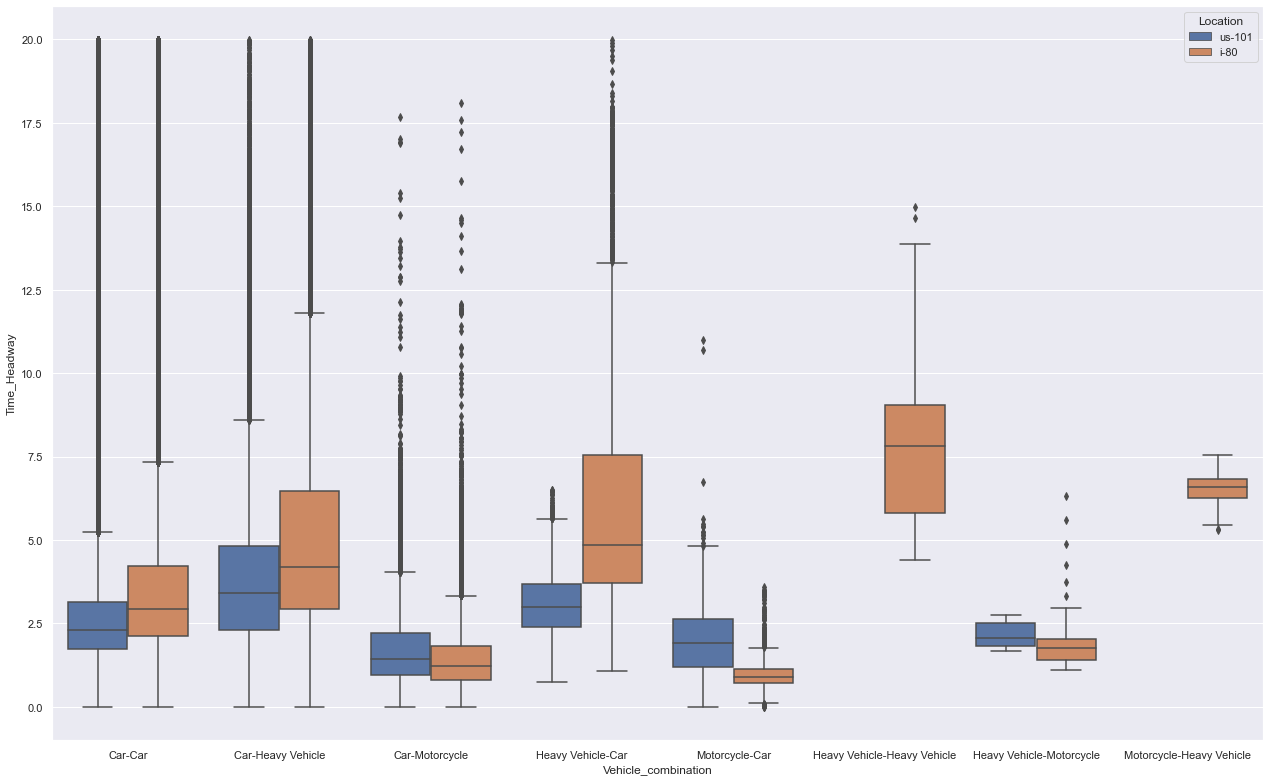

In [31]:
filtered_ngsim= ngsim

sns.boxplot(data=filtered_ngsim,y='Vehicle_Velocity',x='Vehicle_combination',hue="Location")
plt.show()

filtered_ngsim =ngsim[((ngsim['Time_Headway'] < 20 ) ) ]
sns.boxplot(data=filtered_ngsim,y='Time_Headway',x='Vehicle_combination',hue="Location")
plt.show()

<AxesSubplot:xlabel='Vehicle_Velocity', ylabel='Density'>

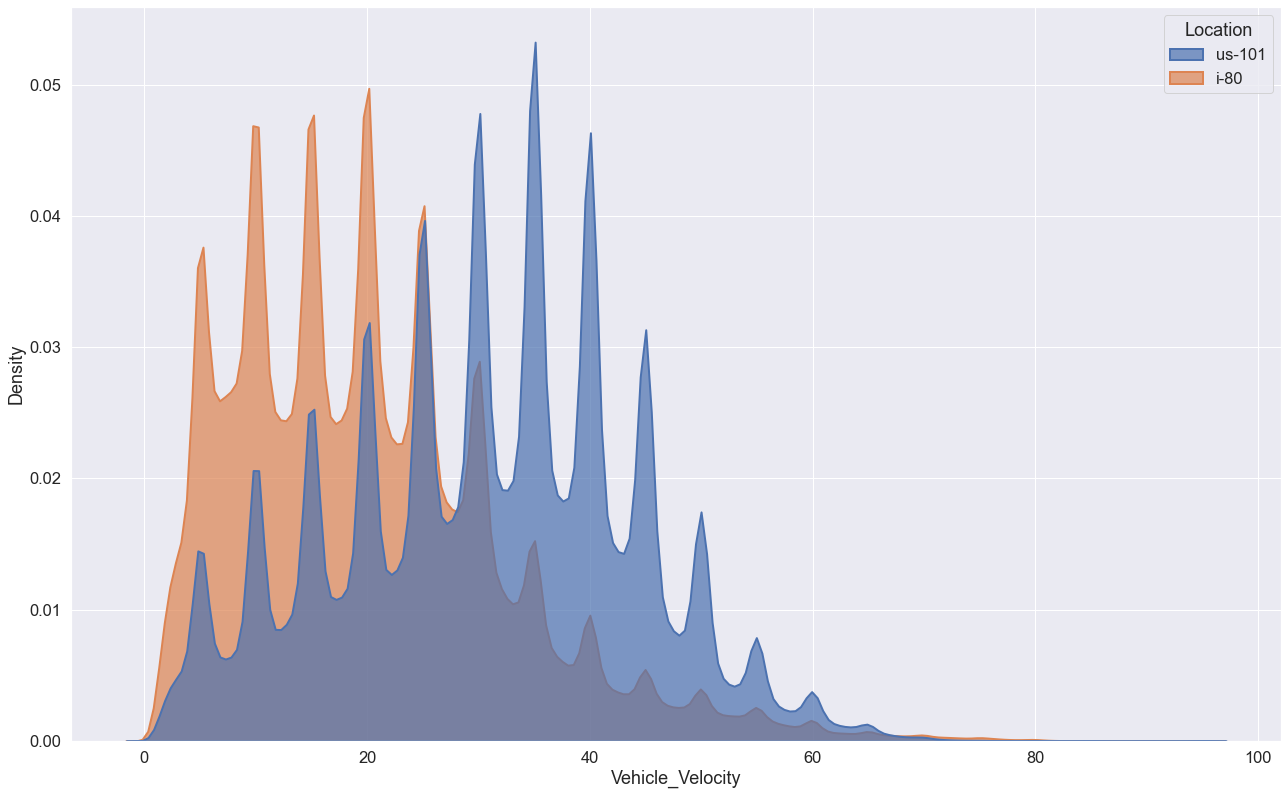

In [32]:
#sns.kdeplot(data=filtered_ngsim,x='Vehicle_Velocity',hue='Location')
sns.set(font_scale = 1.5)
sns.kdeplot(
   data=filtered_ngsim, x="Vehicle_Velocity", hue="Location",
   fill=True, common_norm=False,
   alpha=.7, linewidth=2,
)